# Descriptive Statistics - Stroke Analysis
<hr style="border:1px solid black"> 

## Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


## Variable Descriptions


1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Data Source

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

<hr style="border:1px solid black"> 

## Import Python libraries

In [1]:
# Import Numpy library
import numpy as np

# Import Pandas library
import pandas as pd

# Import Matplotlib library
import matplotlib.pyplot as plt

# Import Seaborn library
import seaborn as sns

## Read in dataset as a dataframe

In [2]:
# Read in stroke data from CSV file
df = pd.read_csv('archive/healthcare-dataset-stroke-data.csv')

## View first 5 rows of dataframe

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Get info on dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Check for null values

In [5]:
# Sum the count of null values by variable
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only the variable bmi has null values. There are 201 of them out of the 5,110 total rows.

## View sample rows of the dataframe where bmi is null

In [6]:
# Pull sample rows from the dataframe where the bmi field is null
df[df["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Since it would be hard to know how to fill in these missing bmi values and we do not want to guess and skew results, we will drop these 201 rows from the dataframe.

## Drop rows with missing values

In [7]:
# Drop rows with any null values (only actually applies to bmi variable in this case)
df = df.dropna()
df.shape

(4909, 12)

We are left with 4,909 rows and 12 columns in our dataframe, and we no longer have to worry about missing values.

## Set variable types as needed

In [8]:
# Since the ID variable is numerical, set it to a string, so it will be interpreted correctly.
df.id = df.id.astype(str)

# Since the hypertension, heart_disease, and stroke variables are binary flags, set these to category type.
df.hypertension = df.hypertension.astype('category')
df.heart_disease = df.heart_disease.astype('category')
df.stroke = df.stroke.astype('category')

## Calculate summary statistics for numerical variables

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60


The only three numerical variables are age, avg_glucose_level, and bmi, and the mean, standard deviation, quartiles, minimum, and maximum can be seen above.

## Plot the histogram and density function plus the boxplot for each numerical variable

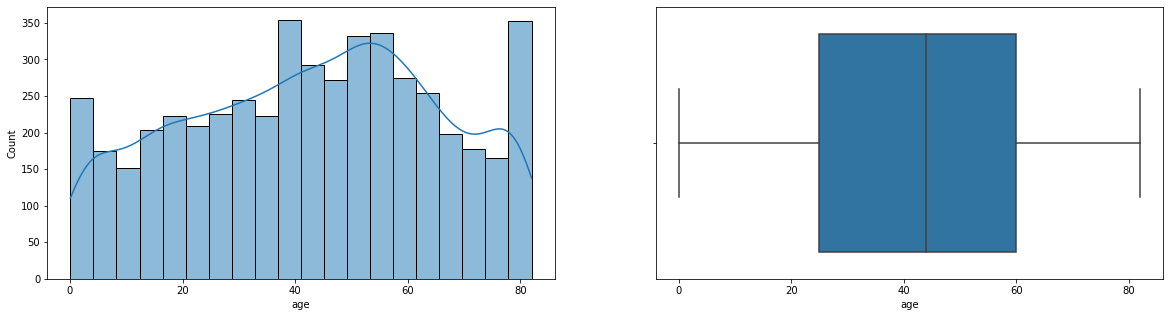

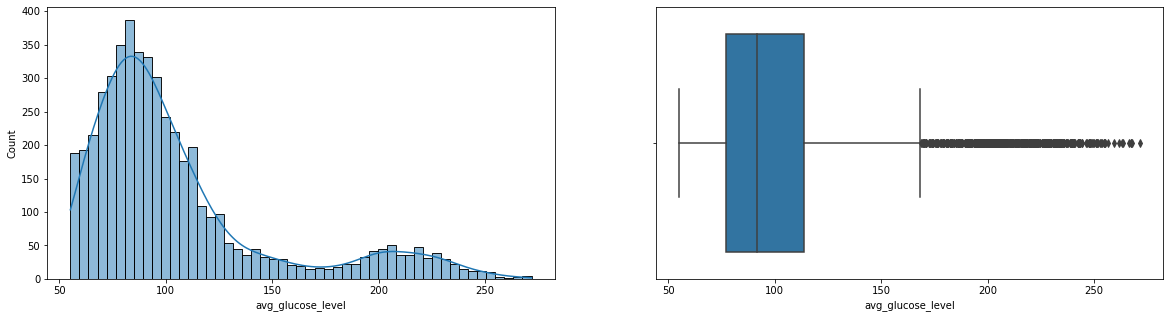

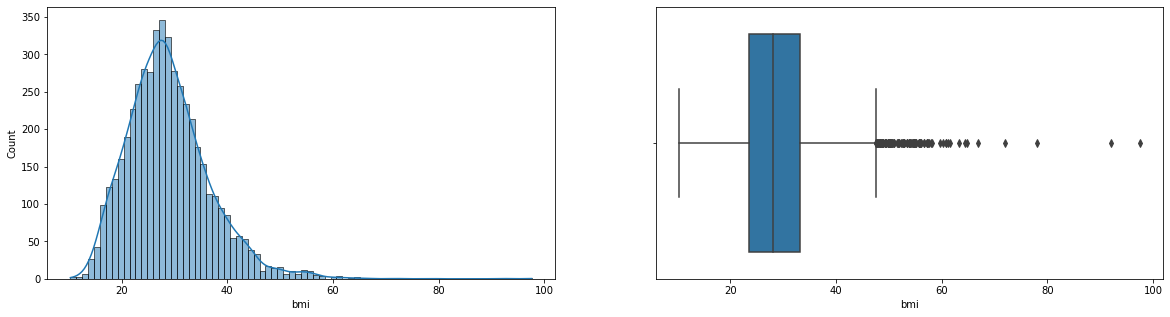

In [10]:
# Since there are multiple numerical variables, write a function named displot_boxplot to plot the graphs we want
def displot_boxplot(df):
    
    # Create a new dateframe that only includes the numerical variables
    num_df = df.select_dtypes(include=[np.number])
    
    # For each variable in the new dataframe, plot the histogram and KDE on top side-by-side with the boxplot
    for col in num_df:
        plt.figure(figsize = (20, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data=num_df[col],kde=True)

        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_df[col])
    
    # Return the plot
    plt.show()

# Call the function and apply to the stroke dataframe
displot_boxplot(df)

The age variable is slightly left skewed, while the avg_glucose_level and bmi variables are right skewed with outliers.

## Calculate the summary statistics of the numerical variables grouped by stroke status

In [11]:
df.groupby('stroke').agg(['mean','median','min','max']).T.unstack(1)

stroke                      0                                 1          \
                         mean median    min     max        mean  median   
age                 41.760451  43.00   0.08   82.00   67.712919   70.00   
avg_glucose_level  104.003736  91.21  55.12  267.76  134.571388  106.58   
bmi                 28.823064  28.00  10.30   97.60   30.471292   29.70   

stroke                            
                     min     max  
age                14.00   82.00  
avg_glucose_level  56.11  271.74  
bmi                16.90   56.60

The average age, avg_glucose_level, and bmi for patients with strokes is higher than those who have not suffered strokes.

## Plot the pairplot of the numerical variables

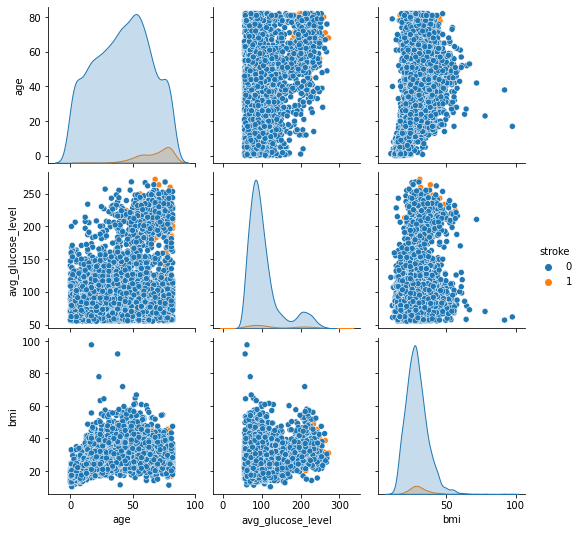

In [12]:
sns.pairplot(data = df, vars = list(df.select_dtypes(include=[np.number]).columns.values), hue = 'stroke')

plt.show()

None of the variables appear to have strong linear correlations.

## Calculate the exact linear correlations of numerical variables grouped by stroke status

In [13]:
corr_matrix = df.groupby('stroke').corr().T
corr_matrix

stroke                    0                                     1  \
                        age avg_glucose_level       bmi       age   
age                1.000000          0.217573  0.345862  1.000000   
avg_glucose_level  0.217573          1.000000  0.164522  0.137518   
bmi                0.345862          0.164522  1.000000 -0.299468   

stroke                                         
                  avg_glucose_level       bmi  
age                        0.137518 -0.299468  
avg_glucose_level          1.000000  0.335369  
bmi                        0.335369  1.000000

As the pairplot showed, none of the linear correlations are very strong. Bmi and age for patients with strokes are actually negatively correlated where as all other correlations are positive.

## Plot the correlation heatmaps for patients with and without strokes separately

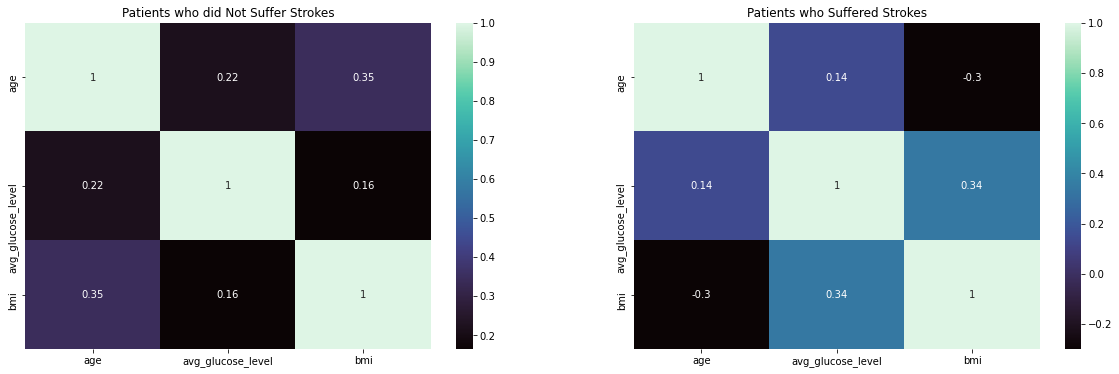

In [14]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(df[df.stroke == 0].corr(), annot = True,cmap='mako').set(title='Patients who did Not Suffer Strokes')

plt.subplot(1, 2, 2)
sns.heatmap(df[df.stroke == 1].corr(), annot = True,cmap='mako').set(title='Patients who Suffered Strokes')

# Display the plot
plt.show()

While this does not give us any new information, it is a more visually appealing version of the correlation matrix.

## Plot the pie charts of smoking status for patients with and without strokes separately

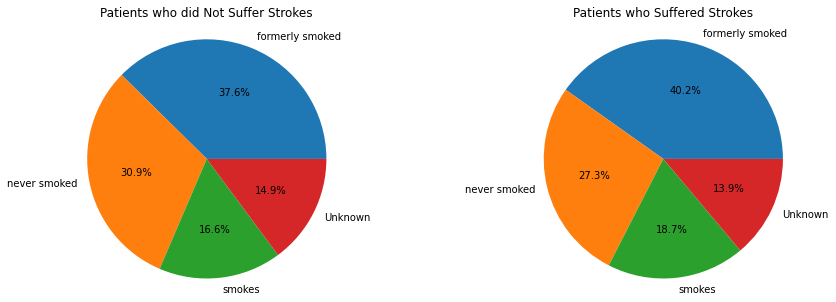

In [22]:
# Plot the pie chart of smoking_status 
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.pie(df[df.stroke == 0].smoking_status.value_counts(), autopct = '%.1f%%', radius = 1.1,
        labels = list(df['smoking_status'].unique()))
plt.title(label='Patients who did Not Suffer Strokes')

plt.subplot(1, 2, 2)
plt.pie(df[df.stroke == 1].smoking_status.value_counts(), autopct = '%.1f%%', radius = 1.1,
        labels = list(df['smoking_status'].unique()))
plt.title(label='Patients who Suffered Strokes')

# Display the plot
plt.show()

Patients who suffered strokes have a higher prevalence of smoking either currently or in the past. Note that there is a large amount of patients (roughly 15%) whose smoking status is unknown, which makes that category less useful. 

## Plot the swarm plots of age by gender and stroke status 

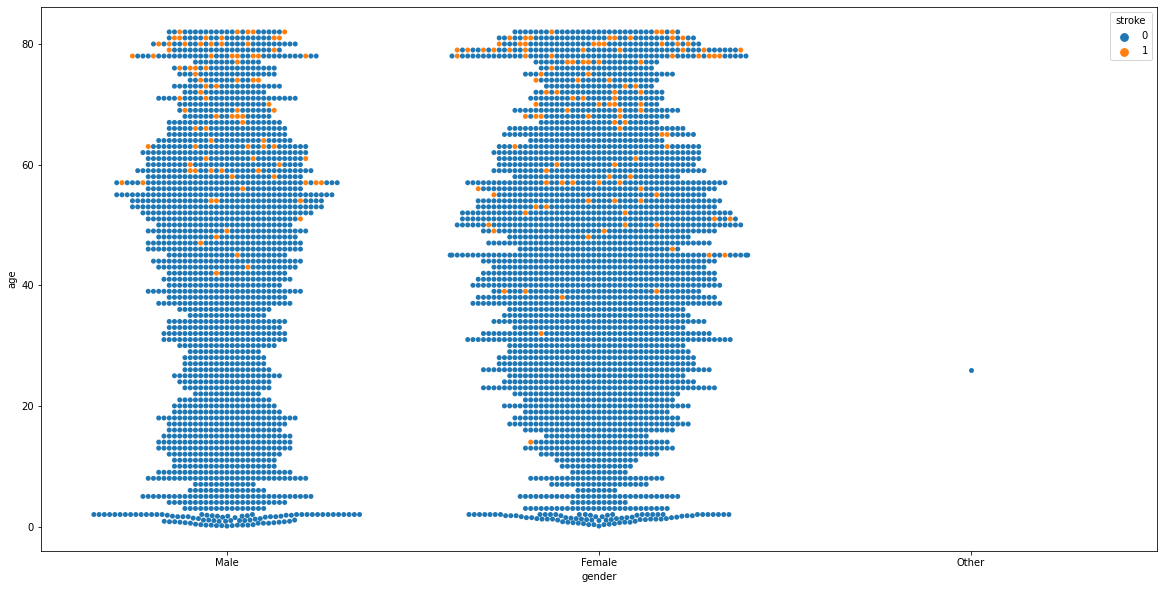

In [36]:
# Plot the swarm plot with age on the y axis, gender on the x axis, and marker color broken down by stroke status
plt.figure(figsize = (20, 10))

sns.swarmplot(y = 'age', x = 'gender', data = df, hue = 'stroke', size = 5)

# Display the plot
plt.show()

The minimum age for females with strokes is younger than for men while the maximum age for both appears to the same.

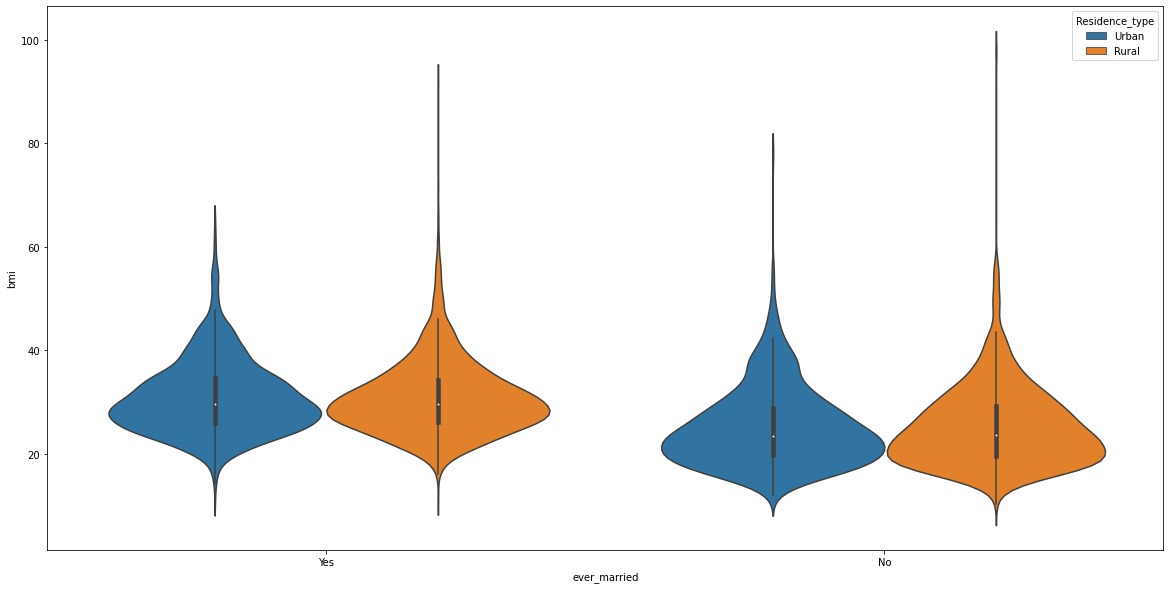

In [48]:
# Plot the volin plot with bmi on the y axis, gender on the x axis, and marker color broken down by stroke status
plt.figure(figsize = (20, 10))

sns.violinplot(y = 'bmi', x = 'ever_married', data = df, hue = 'Residence_type', size = 5)

# Display the plot
plt.show()

Rural patients, regardles of whether they were ever married or not, have more right skewed bmi distributions and higher maximum bmi values than urban patients.